In [1]:
#Importing all the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
#Load the Melbourne housing data csv file

house_df=pd.read_csv("melb_data.csv")

In [3]:
###Cleaning all qualitative values###

#Clean Suburb
house_df['Suburb'] = house_df['Suburb'].str.strip()
print house_df['Suburb'].value_counts()

#Clean Date
house_df['Date'].isna().sum()
print house_df['Date'].value_counts()

#Clean Address
house_df['Address'] = house_df['Address'].str.strip()
print house_df['Address'].value_counts()

#Clean Type
house_df['Type'] = house_df['Type'].str.strip()
print house_df['Type'].value_counts()

#Clean Method
house_df['Method'] = house_df['Method'].str.strip()
print house_df['Method'].value_counts()

#Clean Seller
house_df['SellerG'] = house_df['SellerG'].str.strip()
print house_df['SellerG'].value_counts()

#Clean CouncilArea
house_df['CouncilArea'] = house_df['CouncilArea'].str.strip()
print house_df['CouncilArea'].value_counts()

#Clean Region name
house_df['Regionname'] = house_df['Regionname'].str.strip()
print house_df['Regionname'].value_counts()

Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
Essendon              220
South Yarra           202
Glen Iris             195
Hawthorn              191
Coburg                190
Northcote             188
Brighton              186
Kew                   177
Pascoe Vale           171
Balwyn North          171
Yarraville            164
St Kilda              162
Glenroy               159
Port Melbourne        153
Moonee Ponds          149
Carnegie              146
Thornbury             139
Bentleigh             139
Brighton East         138
Newport               137
Camberwell            132
Footscray             132
Elwood                131
Hampton               130
Ascot Vale            130
                     ... 
Diggers Rest            2
Skye                    2
Mount Evelyn            2
Williams Landing        2
Beaconsfield            2
Hurstbridge             2
Chirnside Park          2
Kooyong     

In [4]:
###Cleaning all quantitative values###

#Clean Distance
print house_df['Distance'].value_counts()
house_df['Distance'].isna().sum()

#Clean Rooms 
print house_df['Rooms'].value_counts()
house_df['Rooms'].isna().sum()

#Clean Postcode
print house_df['Postcode'].value_counts()
house_df['Postcode'].isna().sum() 

#Clean Bedroom
print house_df['Bedroom2'].value_counts()
house_df['Bedroom2'].isna().sum()

#Clean Bathroom
print house_df['Bathroom'].value_counts()
house_df['Bathroom'].isna().sum()

#Clean Car
house_df['Car'].isna().sum()
house_df['Car'].mode()
#Replace na with mode of column which = 2
house_df['Car'].fillna(2.0, inplace=True)
house_df['Car'].value_counts()
print house_df['Car'].isna().sum()

#Clean landsize
house_df['Landsize'].isna().sum()
#Replace nans and zeros with mean of column
house_df['Landsize'].replace(0.0, house_df['Landsize'].mean(), inplace=True)
house_df['Landsize'].value_counts()
print house_df['Landsize'].isna().sum()
    
#Clean Building area
house_df['BuildingArea'].isna().sum()
house_df['BuildingArea'].mean()
#Replace nans with mean of column
house_df['BuildingArea'].fillna(house_df['BuildingArea'].mean(axis=0), inplace=True)
house_df['BuildingArea'].value_counts()
print house_df['BuildingArea'].isna().sum()

#Clean Year Built
house_df['YearBuilt'].isna().sum()
house_df['YearBuilt'].value_counts()
#Replace nans with Mode of column which is 1970
house_df['YearBuilt'].fillna(1970, inplace=True)
print house_df['YearBuilt'].isna().sum()

#Clean Latitude and Longitude
print house_df['Lattitude'].isna().sum()
print house_df['Longtitude'].isna().sum()

#Clean Property count
house_df['Propertycount'].isna().sum()
house_df['Propertycount'].value_counts()
print house_df['Propertycount'].isna().sum()

11.2    739
9.2     367
13.9    324
7.8     306
4.6     263
13.0    252
5.2     248
8.0     248
13.8    237
2.6     235
10.5    223
8.8     223
11.4    218
3.3     214
8.4     205
6.4     202
7.5     201
5.9     200
9.7     182
7.0     158
14.7    155
7.7     152
4.5     150
11.8    145
12.1    145
5.5     141
12.4    140
6.1     137
6.3     130
3.5     126
       ... 
1.3       5
12.5      5
32.3      5
28.5      5
36.9      5
33.3      4
26.0      4
23.3      4
27.2      4
47.3      3
27.7      2
34.6      2
17.6      2
3.7       2
27.1      2
39.0      2
26.1      2
23.8      2
31.6      2
48.1      1
43.3      1
47.4      1
16.6      1
37.5      1
31.4      1
39.8      1
35.5      1
29.3      1
45.2      1
44.2      1
Name: Distance, Length: 202, dtype: int64
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64
3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
3165.0    249
3058.0    246
316

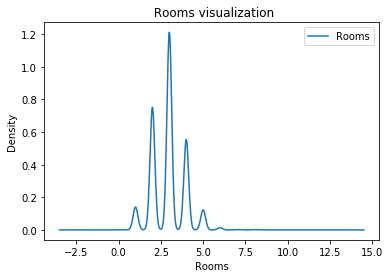

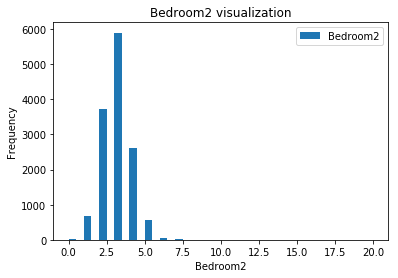

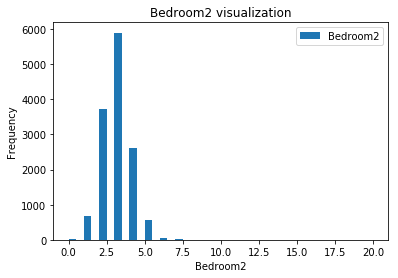

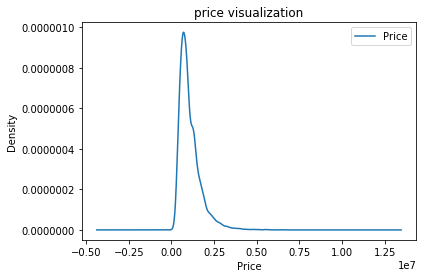

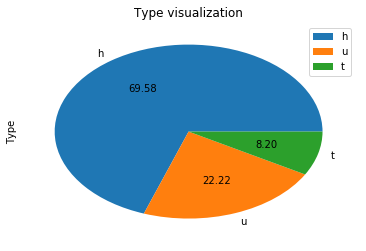

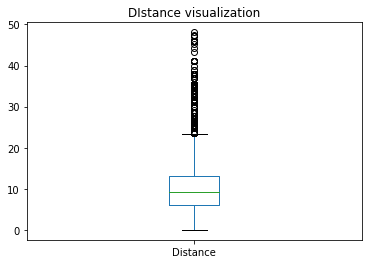

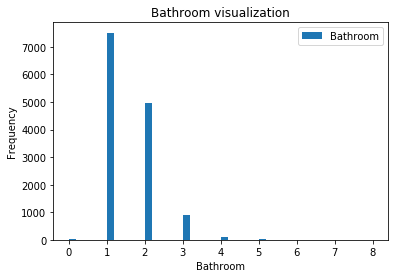

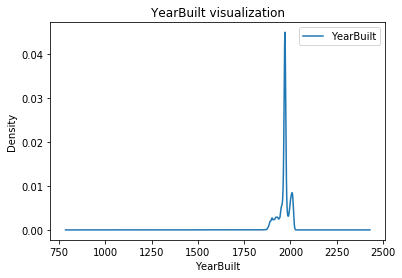

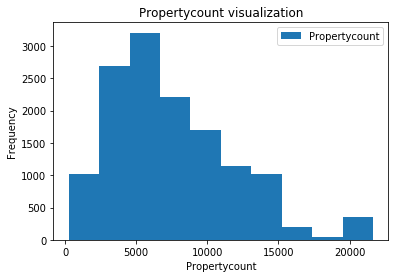

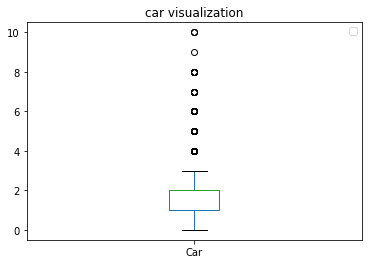

In [5]:
#Task 2 part 1 : Data Exploration 

# plotting Room 
house_df['Rooms'].plot(kind='density')
plt.title(' Rooms visualization')
plt.xlabel('Rooms')
plt.legend(loc = 'upper right')
plt.show()

#plotting Bedroom2
house_df['Bedroom2'].plot(kind='hist', bins=40)
plt.title('Bedroom2 visualization')
plt.xlabel('Bedroom2')
plt.legend(loc = 'upper right')
plt.show()

#plotting Postcode
house_df['Bedroom2'].plot(kind='hist', bins=40)
plt.title('Bedroom2 visualization')
plt.xlabel('Bedroom2')
plt.legend(loc = 'upper right')
plt.show()

# plotting price
house_df['Price'].plot(kind='density')
plt.title('price visualization')
plt.xlabel('Price')
plt.legend(loc = 'upper right')
plt.show()

#plotting Type
house_df['Type'].value_counts().plot(kind='pie',autopct='%.2f')  
plt.legend(loc = 'upper right')
plt.title('Type visualization')
plt.show()

#plotting distance
house_df['Distance'].plot(kind='box')
plt.title('DIstance visualization')
plt.show()

#plotting Bathroom
house_df['Bathroom'].plot(kind='hist', bins=40)
plt.title('Bathroom visualization')
plt.xlabel('Bathroom')
plt.legend(loc = 'upper right')
plt.show()

#plotting Yearbuilt
house_df['YearBuilt'].plot(kind='density')
plt.title('YearBuilt visualization')
plt.xlabel('YearBuilt')
plt.legend(loc = 'upper right')
plt.show()

#plotting Propertycount
house_df['Propertycount'].plot(kind='hist')
plt.title('Propertycount visualization')
plt.xlabel('Propertycount')
plt.legend(loc = 'upper right')
plt.show()

#plotting Car
house_df['Car'].plot(kind='box')
plt.title('car visualization')
plt.legend(loc = 'upper right')
plt.show()



/Users/keerthi/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/keerthi/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


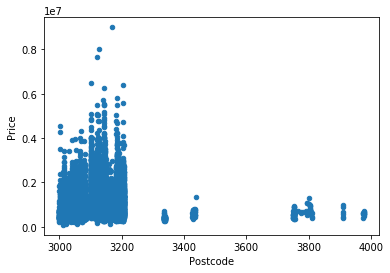

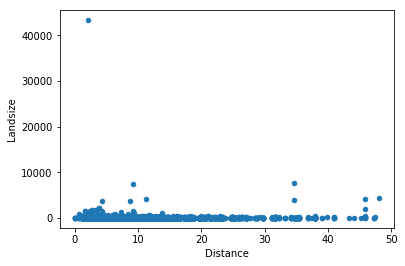

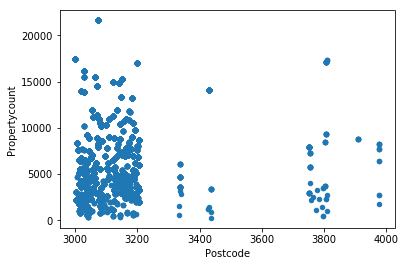

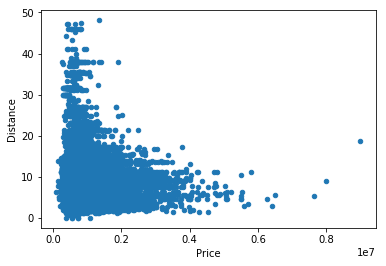

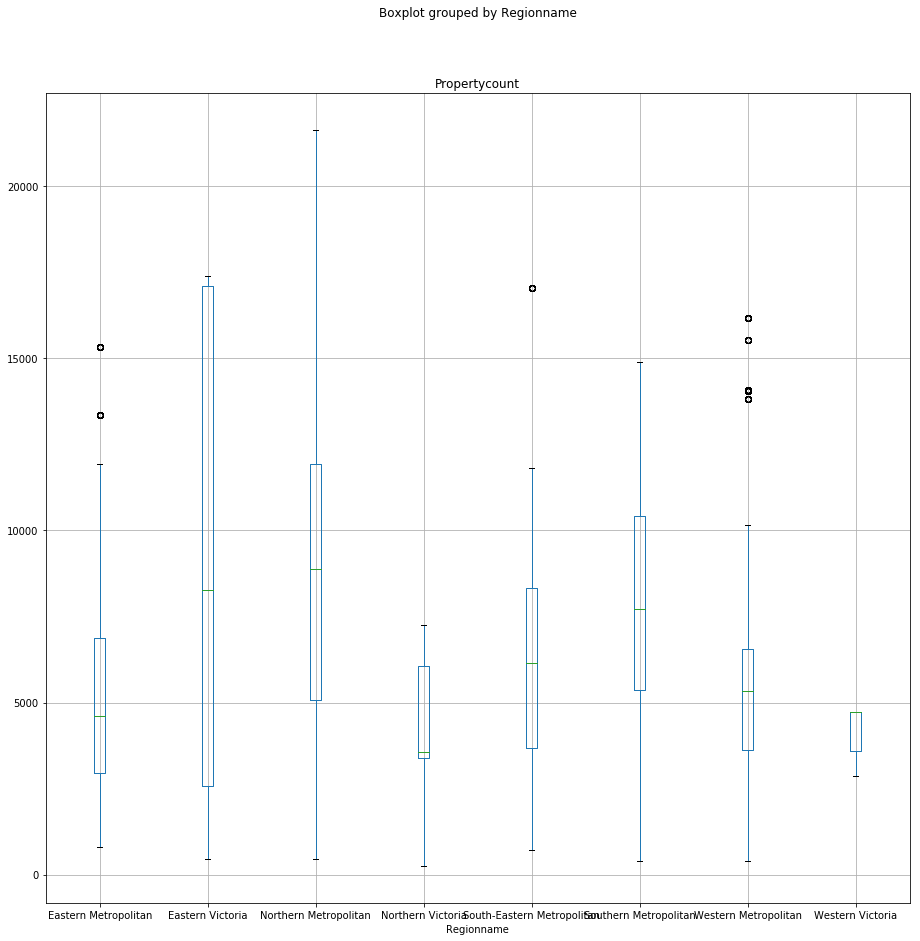

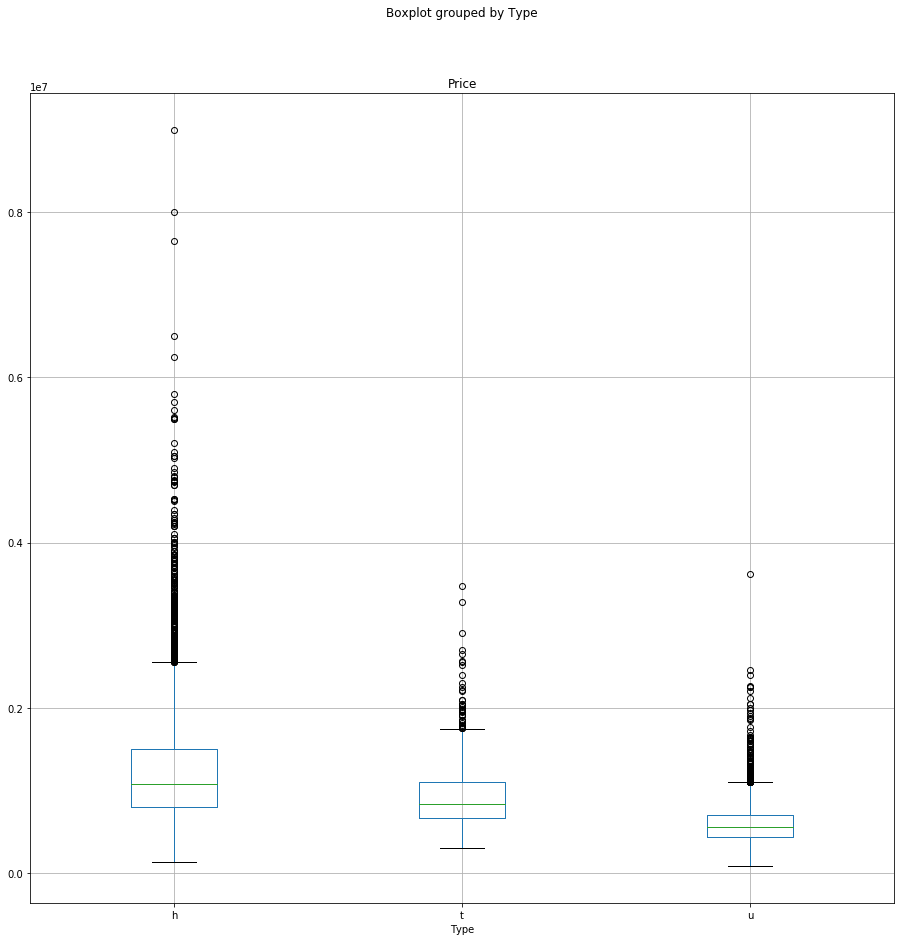

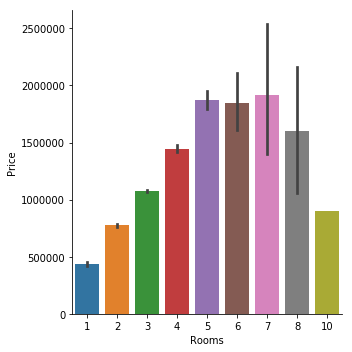

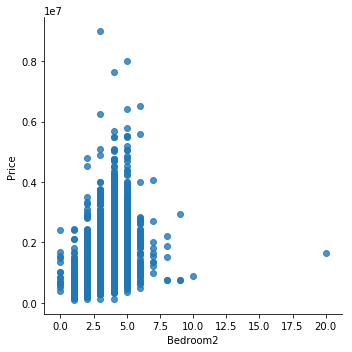

In [6]:
#Task 2 : Data Exploration

#Plotting all Bi-Variate plots

#Plotting Price vs Postcode

house_df.plot(kind='scatter',x=9,y=4)

#Plotting Landsize vs Distance from city
#Scaling down Landsize for better visualization
house_df['Landsize'] = house_df['Landsize'].apply(lambda x: x*0.1)
house_df.plot(kind='scatter',x=8,y=13)

#Plotting Property Count vs Postcode
house_df.plot(kind='scatter',x=9,y=20)

#Plotting Price vs Distance
house_df.plot(kind='scatter',x=4,y=8)

#Increase size of plot#
plt.rcParams['figure.figsize'] = [15, 15]

#Plotting Property Count vs Region name
house_df.dropna().boxplot(column='Propertycount',by='Regionname',widths=0.1)
    

#Plotting Price vs type of property
house_df.dropna().boxplot(column='Price',by='Type')
    
#Plotting number of rooms vs Price
sns.factorplot(x="Rooms", y="Price",  data=house_df, kind="bar")
    
#Plotting Price vs Number of bedrooms
sns.lmplot(data=house_df, x='Bedroom2', y='Price', 
                   fit_reg=False, legend=True, legend_out=True)

In [7]:
#Convert Date to DateTime object
house_df['Date'] =  pd.to_datetime(house_df['Date'])
#Assign it to different variable
house_date_df = pd.DataFrame(house_df)
#Set Date as Index to plot as time series
house_date_df = house_date_df.set_index('Date')

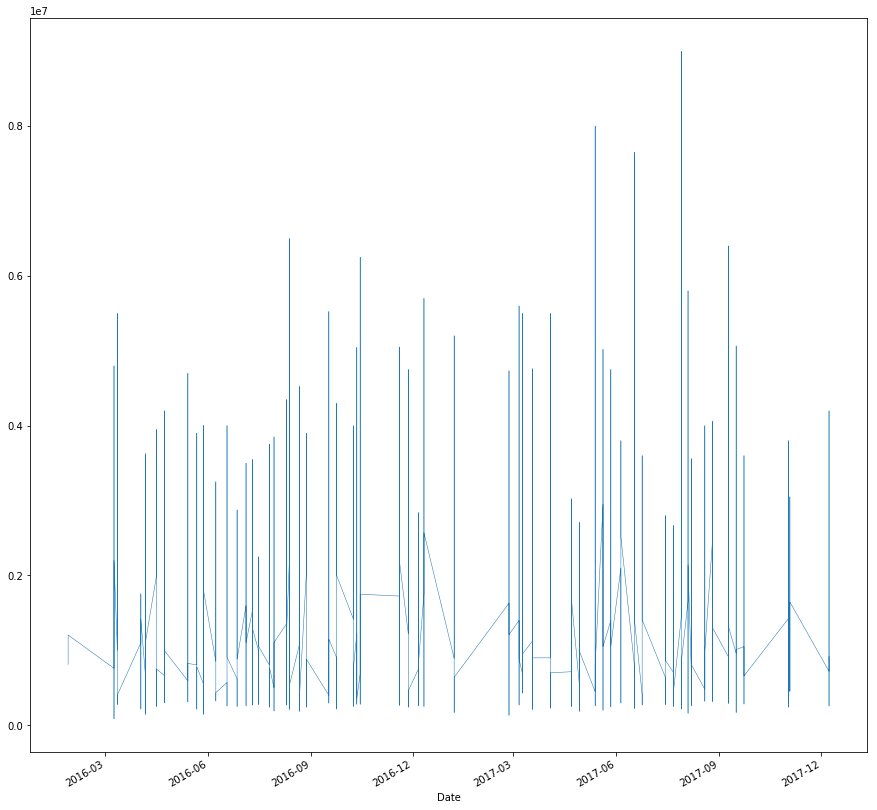

In [8]:
#Plot Price vs Date
house_date_df['Price'].plot(linewidth=0.5);

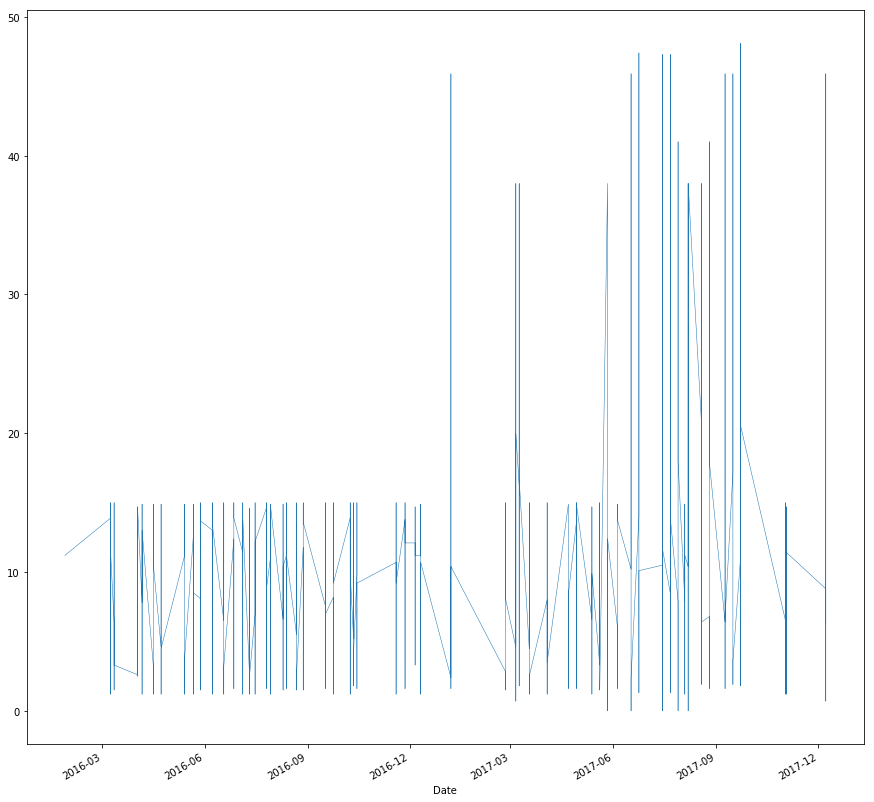

In [9]:
#Plot Date vs Distance from city
house_date_df['Distance'].plot(linewidth=0.5)

In [10]:
###TASK 3 - MODELLING###

#Scaling down price for easier undersating
house_df['Price'] = house_df['Price'].apply(lambda x: x*0.0001)

#Copying to a different variable
house_df_price = house_df


In [11]:
#Function to bin price into different ranges for Classification

def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(cut_points)+1)
    
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [12]:
#Assinging ranges to bin labels
cut_points = [50,100,150]
labels = ["low","medium","high","very high"]

#Calling binning function
house_df_price['Binned'] = binning(house_df_price['Price'], cut_points, labels)

In [13]:
#Copy Binned dataset to dataframe
class_house_df = pd.DataFrame(house_df_price)

In [14]:
#Remove qualitative variables to build classification model
class_target_df = class_house_df['Binned']
class_house_df = class_house_df.drop(['Lattitude', 'Suburb','Address','Longtitude','Regionname','SellerG','Method','CouncilArea','YearBuilt','Date','Binned'],axis=1)

#Assign numeric labels to category
class_house_df['Type'].replace('h', '1', inplace=True)
class_house_df['Type'].replace('t', '2', inplace=True)
class_house_df['Type'].replace('u', '3', inplace=True)

In [15]:
#Split dataset into training and testing sets

X_train5050, X_test5050, y_train5050, y_test5050 = train_test_split(class_house_df,class_target_df.tolist(),test_size=0.50,random_state=4)
X_train6040, X_test6040, y_train6040, y_test6040 = train_test_split(class_house_df,class_target_df.tolist(),test_size=0.40,random_state=4)
X_train8020, X_test8020, y_train8020, y_test8020 = train_test_split(class_house_df,class_target_df.tolist(),test_size=0.20,random_state=4)


In [16]:
#K NEAREST NEIGHBOR CLASSIFIER MODEL

#KNN with K=2 and Train size = 50 , Test size = 50

clf = KNeighborsClassifier(2)

clf.fit(X_train5050, y_train5050)
y_pre5050_k = clf.predict(X_test5050)
score5050k = accuracy_score(y_test5050, y_pre5050_k)
print confusion_matrix(y_test5050,y_pre5050_k)
print classification_report(y_test5050,y_pre5050_k)
print accuracy_score(y_test5050, y_pre5050_k)

[[1500    6   88   25]
 [  10  659  123    0]
 [ 327  326 2468    1]
 [ 234    0    7 1016]]
              precision    recall  f1-score   support

        high       0.72      0.93      0.81      1619
         low       0.66      0.83      0.74       792
      medium       0.92      0.79      0.85      3122
   very high       0.98      0.81      0.88      1257

   micro avg       0.83      0.83      0.83      6790
   macro avg       0.82      0.84      0.82      6790
weighted avg       0.85      0.83      0.83      6790

0.8310751104565538


In [17]:
#KNN with K=3 and Train size = 50 , Test size = 50

clf = KNeighborsClassifier(3)

clf.fit(X_train5050, y_train5050)
y_pre5050_k = clf.predict(X_test5050)
y_pre5050_k
print confusion_matrix(y_test5050,y_pre5050_k)
print classification_report(y_test5050,y_pre5050_k)
print accuracy_score(y_test5050, y_pre5050_k)

[[1378    3  181   57]
 [   3  501  287    1]
 [ 182  157 2780    3]
 [ 164    0    8 1085]]
              precision    recall  f1-score   support

        high       0.80      0.85      0.82      1619
         low       0.76      0.63      0.69       792
      medium       0.85      0.89      0.87      3122
   very high       0.95      0.86      0.90      1257

   micro avg       0.85      0.85      0.85      6790
   macro avg       0.84      0.81      0.82      6790
weighted avg       0.85      0.85      0.84      6790

0.8459499263622975


In [18]:
#KNN with K=4 and Train size = 50 , Test size = 50

clf = KNeighborsClassifier(4)

clf.fit(X_train5050, y_train5050)
y_pre5050_k = clf.predict(X_test5050)
score5050k = accuracy_score(y_test5050, y_pre5050_k)
print confusion_matrix(y_test5050,y_pre5050_k)
print classification_report(y_test5050,y_pre5050_k)
print accuracy_score(y_test5050, y_pre5050_k)

[[1436    5  138   40]
 [   4  546  242    0]
 [ 247  250 2621    4]
 [ 224    1    9 1023]]
              precision    recall  f1-score   support

        high       0.75      0.89      0.81      1619
         low       0.68      0.69      0.69       792
      medium       0.87      0.84      0.85      3122
   very high       0.96      0.81      0.88      1257

   micro avg       0.83      0.83      0.83      6790
   macro avg       0.82      0.81      0.81      6790
weighted avg       0.84      0.83      0.83      6790

0.8285714285714286


In [19]:
#KNN with K=5 and Train size = 50 , Test size = 50

clf = KNeighborsClassifier(5)

clf.fit(X_train5050, y_train5050)
y_pre5050_k = clf.predict(X_test5050)
score5050k = accuracy_score(y_test5050, y_pre5050_k)
print confusion_matrix(y_test5050,y_pre5050_k)
print classification_report(y_test5050,y_pre5050_k)
print accuracy_score(y_test5050, y_pre5050_k)

[[1332    5  225   57]
 [   3  439  350    0]
 [ 157  162 2800    3]
 [ 167    1    8 1081]]
              precision    recall  f1-score   support

        high       0.80      0.82      0.81      1619
         low       0.72      0.55      0.63       792
      medium       0.83      0.90      0.86      3122
   very high       0.95      0.86      0.90      1257

   micro avg       0.83      0.83      0.83      6790
   macro avg       0.83      0.78      0.80      6790
weighted avg       0.83      0.83      0.83      6790

0.8324005891016201


In [20]:
#KNN with K=6 and Train size = 50 , Test size = 50

clf = KNeighborsClassifier(6)

clf.fit(X_train5050, y_train5050)
y_pre5050_k = clf.predict(X_test5050)
score5050k = accuracy_score(y_test5050, y_pre5050_k)
print confusion_matrix(y_test5050,y_pre5050_k)
print classification_report(y_test5050,y_pre5050_k)
print accuracy_score(y_test5050, y_pre5050_k)



[[1387    5  185   42]
 [   4  473  315    0]
 [ 226  196 2698    2]
 [ 225    1    7 1024]]
              precision    recall  f1-score   support

        high       0.75      0.86      0.80      1619
         low       0.70      0.60      0.64       792
      medium       0.84      0.86      0.85      3122
   very high       0.96      0.81      0.88      1257

   micro avg       0.82      0.82      0.82      6790
   macro avg       0.81      0.78      0.80      6790
weighted avg       0.83      0.82      0.82      6790

0.8220913107511045


In [21]:
#KNN with K=2 and Train size = 60 , Test size = 40

clf = KNeighborsClassifier(2)

clf.fit(X_train6040, y_train6040)
y_pre6040_k = clf.predict(X_test6040)
y_pre6040_k
print confusion_matrix(y_test6040,y_pre6040_k)
print classification_report(y_test6040,y_pre6040_k)
print accuracy_score(y_test6040, y_pre6040_k)

[[1189    4   74   21]
 [   4  528   94    0]
 [ 228  235 2038    0]
 [ 186    0    5  826]]
              precision    recall  f1-score   support

        high       0.74      0.92      0.82      1288
         low       0.69      0.84      0.76       626
      medium       0.92      0.81      0.87      2501
   very high       0.98      0.81      0.89      1017

   micro avg       0.84      0.84      0.84      5432
   macro avg       0.83      0.85      0.83      5432
weighted avg       0.86      0.84      0.85      5432

0.8433357879234168


In [22]:
#KNN with K=3 and Train size = 60 , Test size = 40
clf = KNeighborsClassifier(3)

clf.fit(X_train6040, y_train6040)
y_pre6040_k = clf.predict(X_test6040)
y_pre6040_k
print confusion_matrix(y_test6040,y_pre6040_k)
print classification_report(y_test6040,y_pre6040_k)
print accuracy_score(y_test6040, y_pre6040_k)

[[1096    3  138   51]
 [   1  420  205    0]
 [ 133  120 2246    2]
 [ 125    0    5  887]]
              precision    recall  f1-score   support

        high       0.81      0.85      0.83      1288
         low       0.77      0.67      0.72       626
      medium       0.87      0.90      0.88      2501
   very high       0.94      0.87      0.91      1017

   micro avg       0.86      0.86      0.86      5432
   macro avg       0.85      0.82      0.83      5432
weighted avg       0.86      0.86      0.86      5432

0.8558541973490427


In [23]:
#KNN with K=4 and Train size = 60 , Test size = 40
clf = KNeighborsClassifier(4)

clf.fit(X_train6040, y_train6040)
y_pre6040_k = clf.predict(X_test6040)
y_pre6040_k
print confusion_matrix(y_test6040,y_pre6040_k)
print classification_report(y_test6040,y_pre6040_k)
print accuracy_score(y_test6040, y_pre6040_k)

[[1146    3  107   32]
 [   1  449  176    0]
 [ 175  199 2122    5]
 [ 181    0    6  830]]
              precision    recall  f1-score   support

        high       0.76      0.89      0.82      1288
         low       0.69      0.72      0.70       626
      medium       0.88      0.85      0.86      2501
   very high       0.96      0.82      0.88      1017

   micro avg       0.84      0.84      0.84      5432
   macro avg       0.82      0.82      0.82      5432
weighted avg       0.84      0.84      0.84      5432

0.8370765832106039


In [24]:
#KNN with K=5 and Train size = 60 , Test size = 40
clf = KNeighborsClassifier(5)

clf.fit(X_train6040, y_train6040)
y_pre6040_k = clf.predict(X_test6040)
y_pre6040_k
print confusion_matrix(y_test6040,y_pre6040_k)
print classification_report(y_test6040,y_pre6040_k)
print accuracy_score(y_test6040, y_pre6040_k)

[[1065    3  177   43]
 [   1  352  273    0]
 [ 112  116 2270    3]
 [ 135    0    9  873]]
              precision    recall  f1-score   support

        high       0.81      0.83      0.82      1288
         low       0.75      0.56      0.64       626
      medium       0.83      0.91      0.87      2501
   very high       0.95      0.86      0.90      1017

   micro avg       0.84      0.84      0.84      5432
   macro avg       0.84      0.79      0.81      5432
weighted avg       0.84      0.84      0.84      5432

0.8394698085419735


In [25]:
#KNN with K=6 and Train size = 60 , Test size = 40
clf = KNeighborsClassifier(6)

clf.fit(X_train6040, y_train6040)
y_pre6040_k = clf.predict(X_test6040)
y_pre6040_k
print confusion_matrix(y_test6040,y_pre6040_k)
print classification_report(y_test6040,y_pre6040_k)
print accuracy_score(y_test6040, y_pre6040_k)

[[1115    1  138   34]
 [   1  375  250    0]
 [ 153  143 2201    4]
 [ 179    0    6  832]]
              precision    recall  f1-score   support

        high       0.77      0.87      0.82      1288
         low       0.72      0.60      0.66       626
      medium       0.85      0.88      0.86      2501
   very high       0.96      0.82      0.88      1017

   micro avg       0.83      0.83      0.83      5432
   macro avg       0.82      0.79      0.80      5432
weighted avg       0.84      0.83      0.83      5432

0.832658321060383


In [26]:
#KNN with K=2 and Train size = 80 , Test size = 20
clf = KNeighborsClassifier(2)
clf.fit(X_train8020, y_train8020)
y_pre8020_k = clf.predict(X_test8020)
y_pre8020_k
print confusion_matrix(y_test8020,y_pre8020_k)
print classification_report(y_test8020,y_pre8020_k)
print accuracy_score(y_test8020, y_pre8020_k)

[[ 609    3   30    8]
 [   2  276   38    0]
 [ 125  103 1030    0]
 [  86    0    3  403]]
              precision    recall  f1-score   support

        high       0.74      0.94      0.83       650
         low       0.72      0.87      0.79       316
      medium       0.94      0.82      0.87      1258
   very high       0.98      0.82      0.89       492

   micro avg       0.85      0.85      0.85      2716
   macro avg       0.84      0.86      0.85      2716
weighted avg       0.87      0.85      0.86      2716

0.853460972017673


In [27]:
#KNN with K=3 and Train size = 80 , Test size = 20
clf = KNeighborsClassifier(3)
clf.fit(X_train8020, y_train8020)
y_pre8020_k = clf.predict(X_test8020)
y_pre8020_k
print confusion_matrix(y_test8020,y_pre8020_k)
print classification_report(y_test8020,y_pre8020_k)
print accuracy_score(y_test8020, y_pre8020_k)

[[ 571    1   54   24]
 [   1  226   89    0]
 [  60   56 1141    1]
 [  53    0    4  435]]
              precision    recall  f1-score   support

        high       0.83      0.88      0.86       650
         low       0.80      0.72      0.75       316
      medium       0.89      0.91      0.90      1258
   very high       0.95      0.88      0.91       492

   micro avg       0.87      0.87      0.87      2716
   macro avg       0.87      0.85      0.86      2716
weighted avg       0.87      0.87      0.87      2716

0.8737113402061856


In [28]:
#KNN with K=4 and Train size = 80 , Test size = 20
clf = KNeighborsClassifier(4)
clf.fit(X_train8020, y_train8020)
y_pre8020_k = clf.predict(X_test8020)
y_pre8020_k
print confusion_matrix(y_test8020,y_pre8020_k)
print classification_report(y_test8020,y_pre8020_k)
print accuracy_score(y_test8020, y_pre8020_k)

[[ 589    1   45   15]
 [   1  242   73    0]
 [  96   86 1073    3]
 [  77    0    3  412]]
              precision    recall  f1-score   support

        high       0.77      0.91      0.83       650
         low       0.74      0.77      0.75       316
      medium       0.90      0.85      0.88      1258
   very high       0.96      0.84      0.89       492

   micro avg       0.85      0.85      0.85      2716
   macro avg       0.84      0.84      0.84      2716
weighted avg       0.86      0.85      0.85      2716

0.8527245949926362


In [29]:
#KNN with K=5 and Train size = 80 , Test size = 20
clf = KNeighborsClassifier(5)
clf.fit(X_train8020, y_train8020)
y_pre8020_k = clf.predict(X_test8020)
y_pre8020_k
print confusion_matrix(y_test8020,y_pre8020_k)
print classification_report(y_test8020,y_pre8020_k)
print accuracy_score(y_test8020, y_pre8020_k)

[[ 554    1   68   27]
 [   1  201  114    0]
 [  54   51 1152    1]
 [  60    0    7  425]]
              precision    recall  f1-score   support

        high       0.83      0.85      0.84       650
         low       0.79      0.64      0.71       316
      medium       0.86      0.92      0.89      1258
   very high       0.94      0.86      0.90       492

   micro avg       0.86      0.86      0.86      2716
   macro avg       0.85      0.82      0.83      2716
weighted avg       0.86      0.86      0.86      2716

0.8586156111929307


In [30]:
#KNN with K=2 and Train size = 80 , Test size = 20
clf = KNeighborsClassifier(6)
clf.fit(X_train8020, y_train8020)
y_pre8020_k = clf.predict(X_test8020)
y_pre8020_k
print confusion_matrix(y_test8020,y_pre8020_k)
print classification_report(y_test8020,y_pre8020_k)
print accuracy_score(y_test8020, y_pre8020_k)

[[ 577    1   54   18]
 [   2  211  103    0]
 [  83   67 1106    2]
 [  75    0    4  413]]
              precision    recall  f1-score   support

        high       0.78      0.89      0.83       650
         low       0.76      0.67      0.71       316
      medium       0.87      0.88      0.88      1258
   very high       0.95      0.84      0.89       492

   micro avg       0.85      0.85      0.85      2716
   macro avg       0.84      0.82      0.83      2716
weighted avg       0.85      0.85      0.85      2716

0.8494108983799705


In [31]:
#Splitting dataset into train and test sets for SVM model

X_train5050d, X_test5050d, y_train5050d, y_test5050d = train_test_split(class_house_df,class_target_df.tolist(),test_size=0.50)
X_train6040d, X_test6040d, y_train6040d, y_test6040d = train_test_split(class_house_df,class_target_df.tolist(),test_size=0.40)
X_train8020d, X_test8020d, y_train8020d, y_test8020d = train_test_split(class_house_df,class_target_df.tolist(),test_size=0.20)


In [32]:
#GridSearch function to find out the best parameter for SVM model
def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [33]:
#Call GridSearch function with the training and testing datasets
svc_param_selection(X_train5050, y_train5050)

/Users/keerthi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'gamma': 0.001}

In [ ]:
svc_param_selection(X_train6040, y_train6040)

In [ ]:
svc_param_selection(X_train8020, y_train8020)

In [ ]:
#SVM Split = 5050 , C = 0.001, Gamma = 100

clf = svm.SVC(gamma=0.001, C=100)
fit = clf.fit(X_train5050d, y_train5050d)
y_pre5050d = fit.predict(X_test5050d)
y_pre5050d
print confusion_matrix(y_test5050d,y_pre5050d)
print classification_report(y_test5050d,y_pre5050d)
print accuracy_score(y_test5050d, y_pre5050d)

In [ ]:
#SVM Split = 8020 , C = 0.001, Gamma = 100

clf = svm.SVC(gamma=0.001, C=100)
fit = clf.fit(X_train8020d, y_train8020d)
y_pre8020d = fit.predict(X_test8020d)
y_pre8020d
print confusion_matrix(y_test8020d,y_pre8020d)
print classification_report(y_test8020d,y_pre8020d)
print accuracy_score(y_test8020d, y_pre8020d)

In [ ]:
#SVM Split = 6040 , C = 0.001, Gamma = 100

clf = svm.SVC(gamma=0.001, C=100)
fit = clf.fit(X_train6040d, y_train6040d)
y_pre6040d = fit.predict(X_test6040d)
y_pre6040d
print confusion_matrix(y_test6040d,y_pre6040d)
print classification_report(y_test6040d,y_pre6040d)
print accuracy_score(y_test6040d, y_pre6040d)

In [ ]:
#SVM Split = 5050 , C = 0.001, Gamma = 10

clf = svm.SVC(gamma=0.001, C=10)
fit = clf.fit(X_train5050d, y_train5050d)
y_pre5050d = fit.predict(X_test5050d)
y_pre5050d
print confusion_matrix(y_test5050d,y_pre5050d)
print classification_report(y_test5050d,y_pre5050d)
print accuracy_score(y_test5050d, y_pre5050d)

In [ ]:
#SVM Split = 8020 , C = 0.001, Gamma = 10

clf = svm.SVC(gamma=0.001, C=10)
fit = clf.fit(X_train8020d, y_train8020d)
y_pre8020d = fit.predict(X_test8020d)
y_pre8020d
print confusion_matrix(y_test8020d,y_pre8020d)
print classification_report(y_test8020d,y_pre8020d)
print accuracy_score(y_test8020d, y_pre8020d)

In [ ]:
#SVM Split = 6040 , C = 0.001, Gamma = 10

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=10)
fit = clf.fit(X_train6040d, y_train6040d)
y_pre6040d = fit.predict(X_test6040d)
y_pre6040d
print confusion_matrix(y_test6040d,y_pre6040d)
print classification_report(y_test6040d,y_pre6040d)
print accuracy_score(y_test6040d, y_pre6040d)

In [ ]:
#SVM Split = 5050 , C = 0.0001, Gamma = 1000

clf = svm.SVC(gamma=0.0001, C=1000)
fit = clf.fit(X_train5050d, y_train5050d)
y_pre5050d = fit.predict(X_test5050d)
y_pre5050d
print confusion_matrix(y_test5050d,y_pre5050d)
print classification_report(y_test5050d,y_pre5050d)
print accuracy_score(y_test5050d, y_pre5050d)

In [ ]:
#SVM Split = 8020 , C = 0.0001, Gamma = 1000

clf = svm.SVC(gamma=0.0001, C=1000)
fit = clf.fit(X_train8020d, y_train8020d)
y_pre8020d = fit.predict(X_test8020d)
y_pre8020d
print confusion_matrix(y_test8020d,y_pre8020d)
print classification_report(y_test8020d,y_pre8020d)
print accuracy_score(y_test8020d, y_pre8020d)

In [ ]:
#SVM Split = 6040 , C = 0.0001, Gamma = 1000

from sklearn import svm
clf = svm.SVC(gamma=0.0001, C=1000)
fit = clf.fit(X_train6040d, y_train6040d)
y_pre6040d = fit.predict(X_test6040d)
y_pre6040d
print confusion_matrix(y_test6040d,y_pre6040d)
print classification_report(y_test6040d,y_pre6040d)
print accuracy_score(y_test6040d, y_pre6040d)